In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

from numpy import arange
# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from pandas import Series
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import sqlite3
import seaborn as sns
#import plotly.express as px

pd.options.display.max_rows = 4000

#from pandasql import sqldf

In [2]:
def model_evaluation(y_pred, y_actual):
    """
    returns evaluation metrics for the model:
    Accuracy, F1 Score, R Squre, RMSe
    """
    acc = 0
    f1score = 0
    rmse = 0
    r_sqaure = 0
    
    if len(y_pred) != len(y_actual):
        print('predicted and actual length not equal')
        
    else:
        len_y = len(y_pred)
        
        y_pred_bool =  y_pred >= 0
        y_actual_bool =  y_actual >= 0
        f1score = f1_score(y_actual_bool, y_pred_bool, average='binary')
        acc = accuracy_score(y_actual_bool, y_pred_bool)
        
        rmse = np.sqrt(mse(y_actual, y_pred))
        r_sqaure = r2_score(y_actual, y_pred)
        
    df_evaluation = pd.DataFrame({'Accuracy': pd.Series(acc),
                                 'F1 Score': pd.Series(f1score),
                                 'R Square': pd.Series(r_sqaure),
                                 'RMSE': pd.Series(rmse)})
    return(df_evaluation)

In [3]:
nba_data_final = pd.read_csv('nba_final_data.csv')

In [4]:
print(nba_data_final.columns)

Index(['GAME_ID', 'TEAM_ID_HOME', 'TEAM_ID_AWAY', 'GAME_DATE', 'SEASON',
       'PLUS_MINUS_HOME', 'MIN_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FG3A_HOME',
       'FG3_PCT_HOME', 'FTA_HOME', 'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME',
       'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'FGA_AWAY',
       'FG_PCT_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY',
       'OREB_AWAY', 'DREB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY',
       'TOV_AWAY', 'PF_AWAY', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME',
       'PTS_FB_HOME', 'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME',
       'TEAM_REBOUNDS_HOME', 'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY',
       'PTS_2ND_CHANCE_AWAY', 'PTS_FB_AWAY', 'TEAM_TURNOVERS_AWAY',
       'TOTAL_TURNOVERS_AWAY', 'TEAM_REBOUNDS_AWAY', 'WL_Home_modified',
       'cluster_0h', 'cluster_1h', 'cluster_2h', 'cluster_3h', 'cluster_4h',
       'cluster_5h', 'cluster_6h', 'cluster_7h', 'cluster_8h', 'cluster_9h',
       'cluster_10h', 'cluster_11h', 'cluster_0

In [5]:
game_data_regression = nba_data_final.drop(['GAME_ID','TEAM_ID_HOME','TEAM_ID_AWAY','GAME_DATE','SEASON'
                                           ], axis = 1)

Baseline Team Aggregate Features only - no clusters added

In [6]:
base_x = game_data_regression.drop(['PLUS_MINUS_HOME','WL_Home_modified', 'cluster_0h','cluster_1h', 'cluster_2h', 'cluster_3h', 'cluster_4h', 'cluster_5h', 'cluster_6h', 'cluster_7h', 'cluster_8h', 'cluster_9h', 'cluster_10h', 'cluster_11h', 'cluster_0a', 'cluster_1a', 'cluster_2a', 'cluster_3a', 'cluster_4a', 'cluster_5a', 'cluster_6a', 'cluster_7a', 'cluster_8a', 'cluster_9a', 'cluster_10a', 'cluster_11a'], axis=1)

base_y = game_data_regression['PLUS_MINUS_HOME']

In [7]:
print(base_x.columns)

Index(['MIN_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FG3A_HOME', 'FG3_PCT_HOME',
       'FTA_HOME', 'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME', 'AST_HOME',
       'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'FGA_AWAY',
       'FG_PCT_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY',
       'OREB_AWAY', 'DREB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY',
       'TOV_AWAY', 'PF_AWAY', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME',
       'PTS_FB_HOME', 'TEAM_TURNOVERS_HOME', 'TOTAL_TURNOVERS_HOME',
       'TEAM_REBOUNDS_HOME', 'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY',
       'PTS_2ND_CHANCE_AWAY', 'PTS_FB_AWAY', 'TEAM_TURNOVERS_AWAY',
       'TOTAL_TURNOVERS_AWAY', 'TEAM_REBOUNDS_AWAY'],
      dtype='object')


In [8]:
X_train_base_raw, X_test_base_raw, y_train_base, y_test_base = train_test_split(base_x, 
                                                    base_y, 
                                                    test_size=0.2, random_state=42)

In [9]:
X_train_base = preprocessing.normalize(X_train_base_raw)
X_test_base = preprocessing.normalize(X_test_base_raw)

In [10]:
lr = LinearRegression()
lr.fit(X_train_base, y_train_base)
pred_y_train_base = lr.predict(X_train_base)
pred_y_test_base = lr.predict(X_test_base)

rmse_train = np.sqrt(metrics.mean_squared_error(y_train_base, pred_y_train_base))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test_base, pred_y_test_base))
print("Mean Squared Error for training {}".format(rmse_train))
print("Mean Squared Error for testing {}".format(rmse_test))

Mean Squared Error for training 12.663492007848715
Mean Squared Error for testing 12.722749782531134


In [11]:
model_evaluation(pred_y_train_base, y_train_base)

,Accuracy,F1 Score,R Square,RMSE
0,0.631274,0.725789,0.091382,12.663492


In [12]:
model_evaluation(pred_y_test_base, y_test_base)

,Accuracy,F1 Score,R Square,RMSE
0,0.646228,0.740004,0.100825,12.72275


Feature: 0, Score: 86.62261
Feature: 1, Score: 127.37790
Feature: 2, Score: 17029.75776
Feature: 3, Score: 103.69158
Feature: 4, Score: 2112.52259
Feature: 5, Score: 153.73686
Feature: 6, Score: 2674.02812
Feature: 7, Score: 35.73425
Feature: 8, Score: 50.64020
Feature: 9, Score: 83.56063
Feature: 10, Score: 78.17098
Feature: 11, Score: 103.78397
Feature: 12, Score: -26.40375
Feature: 13, Score: 31.69104
Feature: 14, Score: -75.45037
Feature: 15, Score: -16105.37910
Feature: 16, Score: -62.70983
Feature: 17, Score: -140.50458
Feature: 18, Score: -119.13181
Feature: 19, Score: -1808.60292
Feature: 20, Score: -77.04718
Feature: 21, Score: -54.65228
Feature: 22, Score: -89.76170
Feature: 23, Score: 145.10506
Feature: 24, Score: -72.94838
Feature: 25, Score: -5.19897
Feature: 26, Score: 46.39879
Feature: 27, Score: 22.65838
Feature: 28, Score: -4.43931
Feature: 29, Score: 24.14961
Feature: 30, Score: -155.81178
Feature: 31, Score: -26.40375
Feature: 32, Score: -88.84756
Feature: 33, Score:

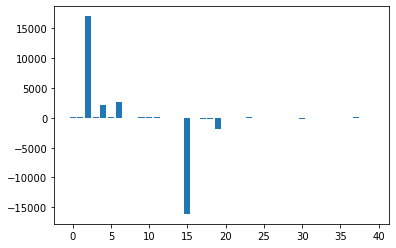

In [13]:
# get importance
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<AxesSubplot:title={'center':'Baseline Model Coefficients'}>

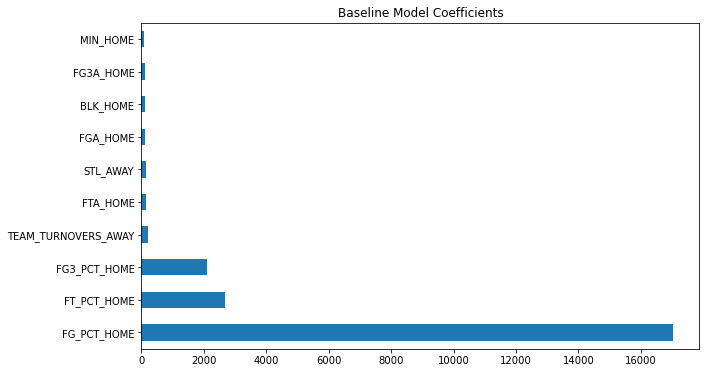

In [14]:
predictors = base_x.columns

coef = Series(lr.coef_,predictors).sort_values()

coef.nlargest(10).plot(kind='barh', figsize=(10,6), title='Baseline Model Coefficients')

Adding cluster data

In [15]:
game_regression_x = game_data_regression.drop(['PLUS_MINUS_HOME','WL_Home_modified'], axis = 1)
game_regression_y = game_data_regression['PLUS_MINUS_HOME']

In [16]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(game_regression_x, 
                                                    game_regression_y, 
                                                    test_size=0.2, random_state=42)

In [17]:
X_train = preprocessing.normalize(X_train_raw)
X_test = preprocessing.normalize(X_test_raw)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train_raw)
#X_test = scaler.transform(X_test_raw)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_y_train = lr.predict(X_train)
pred_y_test = lr.predict(X_test)

rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_y_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_y_test))
print("Mean Squared Error for training {}".format(rmse_train))
print("Mean Squared Error for testing {}".format(rmse_test))

Mean Squared Error for training 12.355500309952523
Mean Squared Error for testing 12.470040163297964


In [19]:
model_evaluation(pred_y_train, y_train)

,Accuracy,F1 Score,R Square,RMSE
0,0.644424,0.728046,0.135042,12.3555


In [20]:
model_evaluation(pred_y_test, y_test)

,Accuracy,F1 Score,R Square,RMSE
0,0.650135,0.736532,0.136191,12.47004


<AxesSubplot:title={'center':'Player Cluster Coefficients'}>

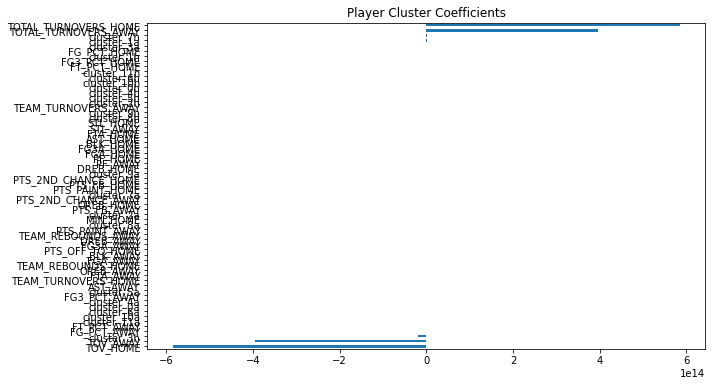

In [21]:
predictors = game_regression_x.columns

coef = Series(lr.coef_,predictors).sort_values()

coef.plot(kind='barh', figsize=(10,6), title='Player Cluster Coefficients')

In [27]:
predictors = game_regression_x.columns

coef = Series(lr.coef_,predictors).sort_values()
print('Feature\t\t\tCoef Importance')
coef

Feature			Coef Importance


TOV_HOME               -5.856242e+14
TOV_AWAY               -3.954055e+14
cluster_3h             -1.912154e+13
FG_PCT_AWAY            -9.280403e+03
FT_PCT_AWAY            -1.434289e+03
cluster_11a            -1.001944e+03
cluster_10a            -5.452988e+02
cluster_6a             -4.975694e+02
cluster_0a             -3.623213e+02
cluster_4a             -3.422559e+02
FG3_PCT_AWAY           -2.758085e+02
cluster_5a             -1.309035e+02
AST_AWAY               -1.188573e+02
TEAM_TURNOVERS_HOME    -1.151564e+02
FTA_AWAY               -1.038496e+02
OREB_AWAY              -9.018229e+01
TEAM_REBOUNDS_HOME     -8.440163e+01
FGA_AWAY               -7.008990e+01
BLK_AWAY               -6.229844e+01
PTS_OFF_TO_HOME        -5.452400e+01
FG3A_AWAY              -5.429712e+01
DREB_AWAY              -5.083396e+01
TEAM_REBOUNDS_AWAY     -3.764285e+01
PTS_PAINT_AWAY         -3.427497e+01
cluster_8a             -3.402435e+01
MIN_HOME               -2.289176e+01
cluster_2a             -2.049150e+01
P

Ridge

In [44]:
# First running Ridge on a short list of alpha values

alphas = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)
#print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-12.421149515885157
0.0001


In [44]:
# Now testing across a much larger set of alphas

alphas = np.logspace(-8, 8, 100)
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)
#print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])},
             scoring='neg_root_mean_squared_error')
-12.421105307362454
7.56463327554629e-05


In [38]:
model1 = Ridge(alpha = 0.0001)
model1.fit(X_train, y_train)

pred_y_train_rr = model1.predict(X_train)
pred_y_test_rr = model1.predict(X_test)

In [39]:
model_evaluation(pred_y_train_rr, y_train)

,Accuracy,F1 Score,R Square,RMSE
0,0.644875,0.728422,0.134449,12.359737


In [40]:
model_evaluation(pred_y_test_rr, y_test)

,Accuracy,F1 Score,R Square,RMSE
0,0.648332,0.735533,0.134684,12.48091


Lasso

In [33]:
# Lasso with short list of alphas

params = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params,  scoring='neg_root_mean_squared_error', cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

C:\Users\mattk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913550.639927609, tolerance: 211.14087228855306
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


{'alpha': 1e-05}
-12.407775570247543


In [39]:
# Test for more values

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params,  scoring='neg_root_mean_squared_error', cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166138.47552769934, tolerance: 211.14087228855306
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520439.0409180252, tolerance: 214.9643430575269
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175866.84913329605, tolerance: 210.3431562494782
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174150.81800389104, tolerance: 211.47436657204875
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29320.428802737035, tolerance: 210.26194233594924
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178918.56937125372, tolerance: 211.14087228855306
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5472.431530580623, tolerance: 209.83807918510476
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3641.88624670892, tolerance: 212.33395741838524
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6344.913879753789, tolerance: 211.47436657204875
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.17918661329895, tolerance: 211.0283004926109
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678.2540627839044, tolerance: 209.83807918510476
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450.49398709461093, tolerance: 212.33395741838524
  model = cd_fast.enet_coordinate_descent(
C:\Users\mattk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

{'alpha': 8.111308307896873e-06}
-12.407884975691559


In [41]:
model2 = Lasso(alpha = 8.1113e-06)
model2.fit(X_train, y_train)

pred_y_train_l = model2.predict(X_train)
pred_y_test_l = model2.predict(X_test)

In [42]:
model_evaluation(pred_y_train_l, y_train)

,Accuracy,F1 Score,R Square,RMSE
0,0.644424,0.728296,0.134394,12.360127


In [43]:
model_evaluation(pred_y_test_l, y_test)

,Accuracy,F1 Score,R Square,RMSE
0,0.649234,0.736152,0.134952,12.478983


In [31]:
alpha_space = np.logspace(-4, 1, 30)   # Checking for alpha from .0001 to 1 and finding the best value for alpha -4, 1, 30
alpha_space

array([1.00000000e-04, 1.48735211e-04, 2.21221629e-04, 3.29034456e-04,
       4.89390092e-04, 7.27895384e-04, 1.08263673e-03, 1.61026203e-03,
       2.39502662e-03, 3.56224789e-03, 5.29831691e-03, 7.88046282e-03,
       1.17210230e-02, 1.74332882e-02, 2.59294380e-02, 3.85662042e-02,
       5.73615251e-02, 8.53167852e-02, 1.26896100e-01, 1.88739182e-01,
       2.80721620e-01, 4.17531894e-01, 6.21016942e-01, 9.23670857e-01,
       1.37382380e+00, 2.04335972e+00, 3.03919538e+00, 4.52035366e+00,
       6.72335754e+00, 1.00000000e+01])

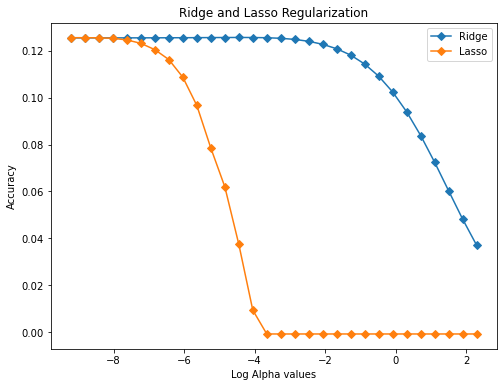

In [37]:
ridge_scores = []
ridge = Ridge(normalize = True)
for alpha in alpha_space:
    ridge.alpha = alpha
    val = np.mean(cross_val_score(ridge, X_train, y_train, cv = 10))
    ridge_scores.append(val)
lasso_scores = []
lasso = Lasso(normalize = True)
for alpha in alpha_space:
    lasso.alpha = alpha
    val = np.mean(cross_val_score(lasso, X_train, y_train, cv = 10))
    lasso_scores.append(val)
plt.figure(figsize=(8, 6))
plt.plot(np.log(alpha_space), ridge_scores, marker = 'D', label = "Ridge")
plt.plot(np.log(alpha_space), lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.title('Ridge and Lasso Regularization')
plt.xlabel('Log Alpha values')
plt.ylabel('Accuracy')
plt.show()


In [50]:
# Exploring Number of features used in different Lasso Regressions

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)


training score: 0.07499559337966433
test score:  0.07537843193185867
number of features used:  13


In [51]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001 )
print( "test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)


training score for alpha=0.01: 0.13396583709716026
test score for alpha =0.01:  0.13403678500703342
number of features used: for alpha =0.01: 51


In [52]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001 )
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.13545060327722525
test score for alpha =0.0001:  0.1368150347206687
number of features used: for alpha =0.0001: 57
